In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("/content/fruit_classification_dataset.csv")

In [13]:
df.head()

,Color,Weight,Fruit
0,Red,176.055567,Apple
1,Yellow,136.975682,Pear
2,Green,129.092192,Pear
3,Yellow,136.766429,Pear
4,Red,197.856507,Apple


In [14]:
# prompt: apply label encoding for colour and fruit

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Color'] = le.fit_transform(df['Color'])
df['Fruit'] = le.fit_transform(df['Fruit'])

print(df.head())


   Color      Weight  Fruit
0      2  176.055567      0
1      3  136.975682      2
2      1  129.092192      2
3      3  136.766429      2
4      2  197.856507      0


In [15]:
df.isnull().sum()

,0
Color,0
Weight,0
Fruit,0


In [16]:


from sklearn.preprocessing import StandardScaler
# Assuming 'df' is your DataFrame and you want to scale numerical features
numerical_cols = ['Color', 'Weight', ] # Replace with your numerical column names
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())


      Color    Weight  Fruit
0  0.440489  1.069382      0
1  1.368862 -0.004300      2
2 -0.487884 -0.220891      2
3  1.368862 -0.010049      2
4  0.440489  1.668342      0


In [17]:


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = df.drop('Fruit', axis=1)
y = df['Fruit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.88


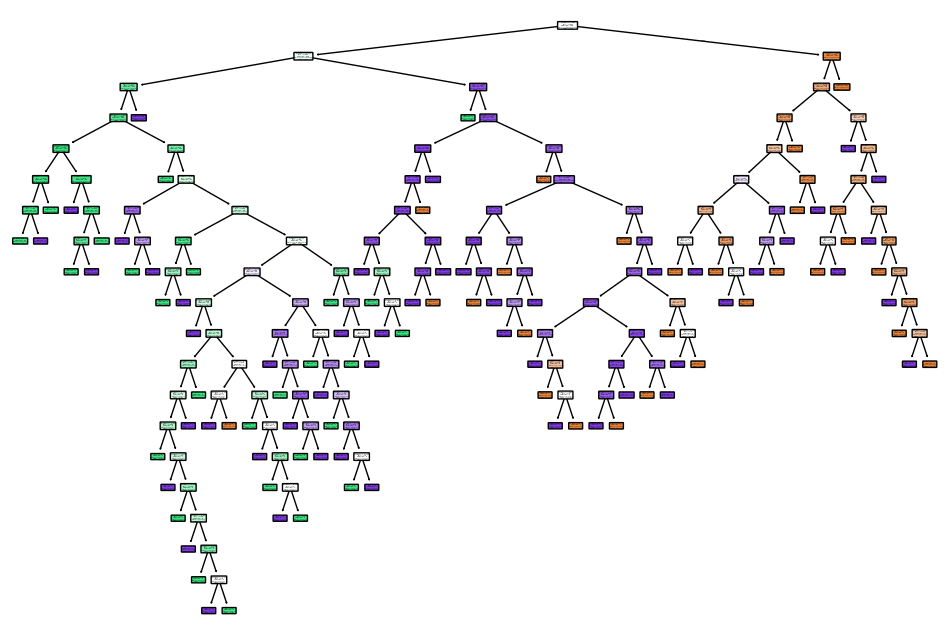

In [18]:

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.show()
